In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('ex2data2.txt', header=None)
X = df[[0, 1]].values
y = df[[2]].values

In [6]:
pos_lab, neg_lab = (y==1).flatten(), (y==0).flatten()

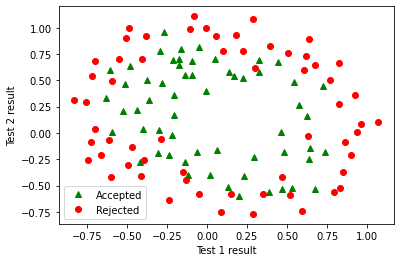

In [7]:
plt.plot(X[pos_lab, 0], X[pos_lab, 1], 'g^', label='Accepted')
plt.plot(X[neg_lab, 0], X[neg_lab, 1], 'ro', label='Rejected')
plt.xlabel('Test 1 result')
plt.ylabel('Test 2 result')
plt.legend()
plt.show()


In [8]:
def map_feature(x1, x2, degree):
    m = len(x1)
    result = np.ones((x1.shape[0], 1))
    for i in range(0, degree+1):
        for j in range (0, degree-i+1):
            result = np.hstack((result, (x1**i) * (x2**j)))
    return result[:, 1:]

In [9]:
Xbar = map_feature(X[:, 0].reshape((-1, 1)), X[:, 0].reshape((-1, 1)), 6)

In [10]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [11]:
def compute_cost(theta, X, y, Lambda):
    m = len(X)
    prediction = sigmoid(X @ theta)
    return -1/m * np.sum(y * np.log(prediction) + (1-y)*np.log(1-prediction))

In [12]:
init_theta = np.zeros((Xbar.shape[1], 1))
# compute_cost(init_theta, Xbar, y, 10)
init_theta[1:, -1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
def descent(theta, X, y, Lambda):
    m = len(y)
    pred = sigmoid (X @ theta)
    theta_0 = 1/m * (X.T @ (pred - y))[0, :].reshape((-1, 1))
    theta_j = 1/m * (X.T @ (pred - y))[1:, :].reshape((-1, 1)) + Lambda/m * theta[1:, :].reshape((-1, 1))
    return np.vstack((theta_0, theta_j))

In [14]:
def grad_descent(theta, X, y, learning_rate, Lambda, iters_count):
    J_history = []
    for i in range(iters_count):
        theta = theta - learning_rate * descent(theta, X, y, Lambda)
        J_history.append(compute_cost(theta, X, y, Lambda))
    return theta, J_history

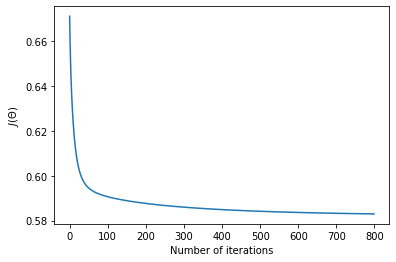

In [15]:
result_theta, J_history = grad_descent(init_theta, Xbar, y, 1, 0.2, 800)
plt.plot(J_history)
plt.xlabel('Number of iterations')
plt.ylabel('$J(\Theta)$')
plt.show()

In [16]:
x1 = np.linspace(-1, 1.2, 50)
x2 = np.linspace(-1, 1.2, 50)
xx1, xx2 = np.meshgrid(x1, x2)

In [17]:
# Xbar2 = map_feature(x1.reshape((-1, 1)), x2.reshape((-1, 1)),6)
def draw_contour(result_theta):
    z = np.zeros((x1.shape[0], x1.shape[0]))
    for i in range(len(x1)):
        for j in range(len(x2)):
            z[i][j] = np.sum(map_feature(x1[i].reshape((-1, 1)), x2[j].reshape((-1, 1)), 6) @ result_theta)
    plt.contour(x1, x2, z, levels=[0.5])
    plt.plot(X[pos_lab, 0], X[pos_lab, 1], 'g^', label='Accepted')
    plt.plot(X[neg_lab, 0], X[neg_lab, 1], 'ro', label='Rejected')
    plt.xlabel('Test 1 result')
    plt.ylabel('Test 2 result')
    plt.legend()
    plt.show()

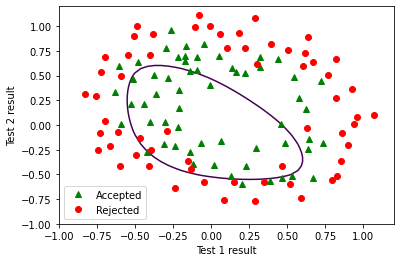

In [18]:
draw_contour(result_theta)